In [79]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
from k2 import K2Processor
from evaluation import extract_params, spawn_model

In [42]:
import utils
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import networkx as nx
import os

In [43]:
test_df = pd.read_csv('/dfs/scratch1/gmachi/k2/K2/src/outputs/wikisection/k2_test_results_points-ALL-COMPLETE-NEW.csv', index_col=0)  # k2 only


In [44]:
filt = test_df[(test_df.encoder == 'minilm') & (test_df.metric == 'auprc')].sort_values('value', ascending=False)
filt.head(20)

,encoder,model,threshold,datum_id,regime,metric,value,method
271,minilm,k25_r1_alpha0.050_tau1.00_lamnan.model,0.7,doc_579_graph.obj,all,auprc,1.0,K2
14,minilm,k25_r1_alpha0.050_tau1.00_lamnan.model,0.7,doc_178_graph.obj,all,auprc,1.0,K2
592,minilm,k25_r1_alpha0.050_tau1.00_lamnan.model,0.7,doc_119_graph.obj,all,auprc,1.0,K2
310,minilm,k25_r1_alpha0.050_tau1.00_lamnan.model,0.7,doc_681_graph.obj,all,auprc,1.0,K2
319,minilm,k25_r1_alpha0.050_tau1.00_lamnan.model,0.7,doc_437_graph.obj,all,auprc,1.0,K2
334,minilm,k25_r1_alpha0.050_tau1.00_lamnan.model,0.7,doc_372_graph.obj,all,auprc,1.0,K2
415,minilm,k25_r1_alpha0.050_tau1.00_lamnan.model,0.7,doc_166_graph.obj,all,auprc,1.0,K2
464,minilm,k25_r1_alpha0.050_tau1.00_lamnan.model,0.7,doc_365_graph.obj,all,auprc,1.0,K2
481,minilm,k25_r1_alpha0.050_tau1.00_lamnan.model,0.7,doc_117_graph.obj,all,auprc,1.0,K2
496,minilm,k25_r1_alpha0.050_tau1.00_lamnan.model,0.7,doc_389_graph.obj,all,auprc,1.0,K2


In [163]:
encoder = 'minilm'

meta_path = "/dfs/scratch1/gmachi/k2/K2/src/outputs/wikisection/minilm_gridsearch/"
processor_cache_dir = meta_path + encoder + "-fitted_k2_processors"
model_cache_dir = meta_path + encoder + "-fitted_k2_models"

G_test_dir = "/dfs/scratch1/gmachi/datasets/wikisection_processed/test_Gs"
G_train_dir = "/dfs/scratch1/gmachi/datasets/wikisection_processed/train_Gs"

model_str = "k25_r1_alpha0.050_tau1.00_lamnan.model" #using the best r>0 model for viz
thresh = 0.7
k,r,alpha,tau,lam = extract_params(model_str)



No G provided, showing model-wide kernel hash-graph
Displaying motif graph with log2 scaling


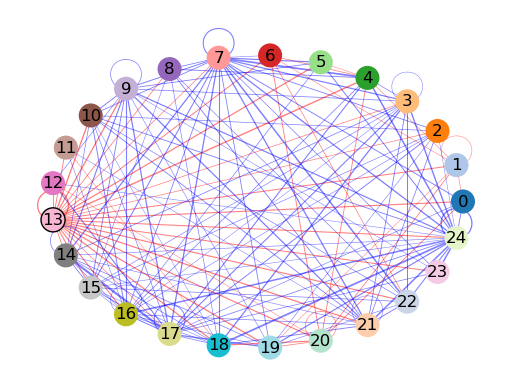

In [214]:
model = utils.deserialize_model(os.path.join(model_cache_dir, model_str))
model.visualize_motif_graph(labels=True)

No G provided, showing model-wide kernel hash-graph
Displaying motif graph with log2 scaling


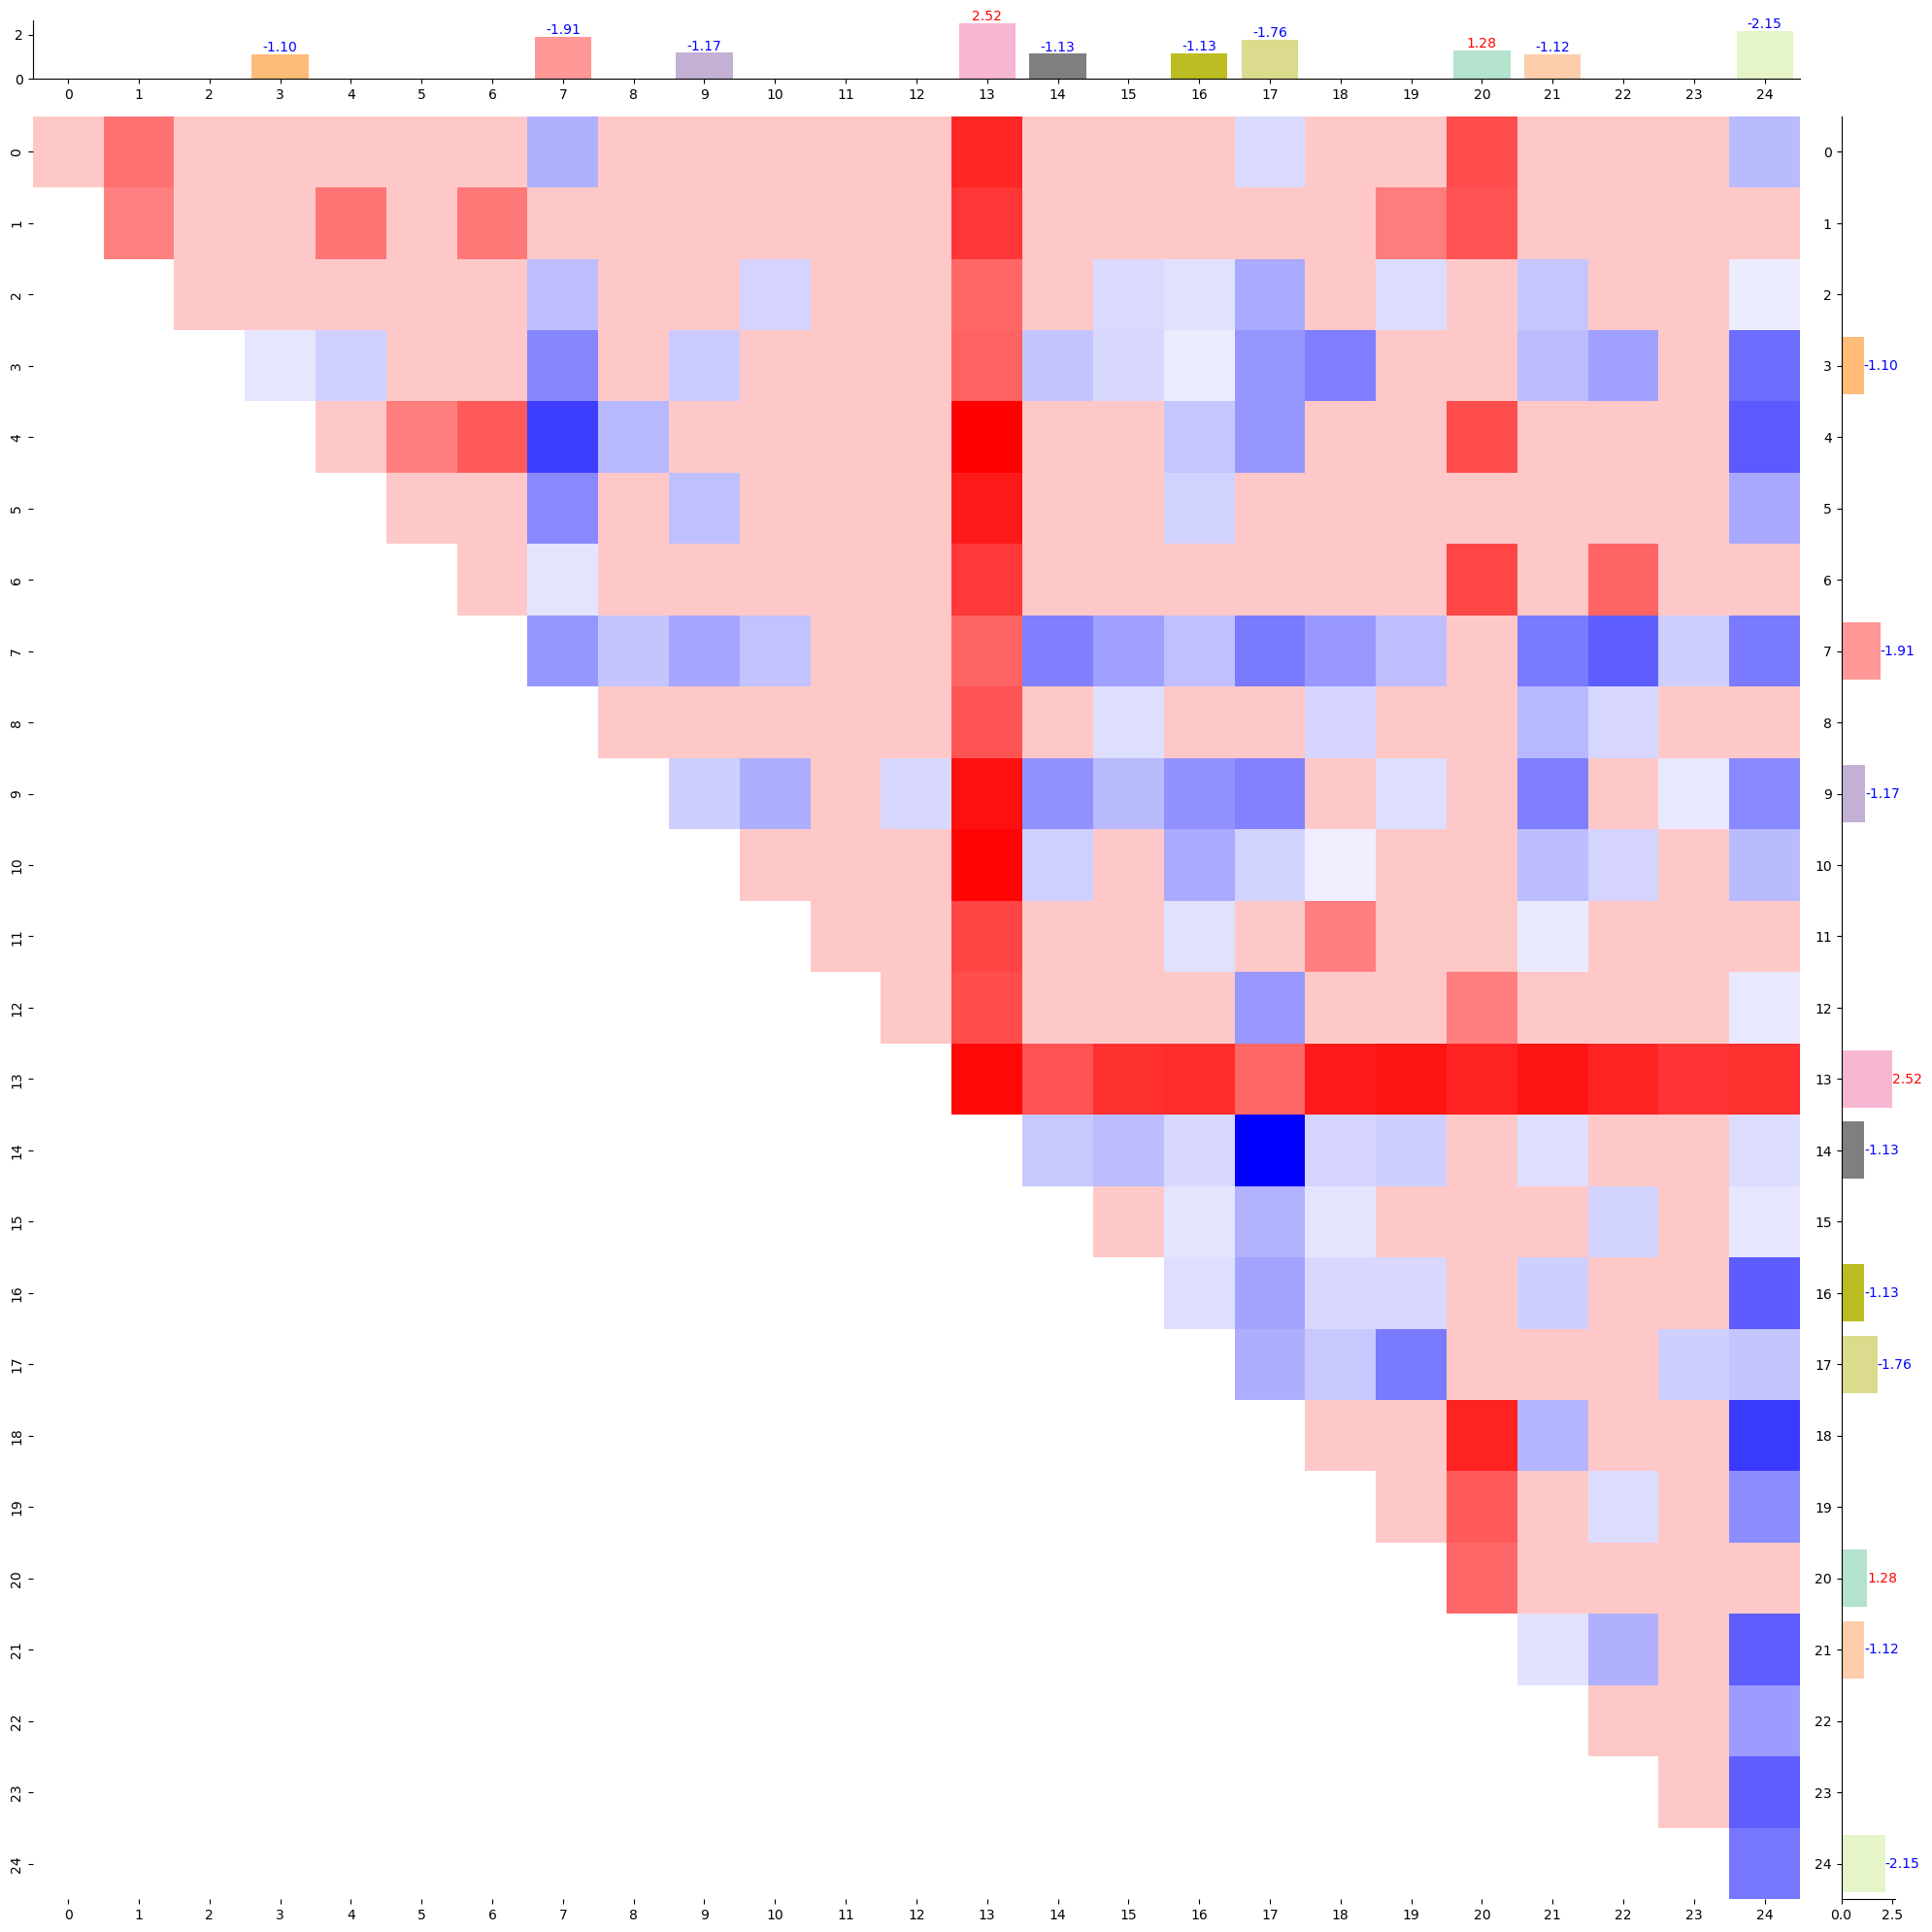

In [252]:
model.visualize_motif_graph(style="matrix")

In [253]:
def create_visualizations(G_id, model_str, processor_cache_dir, model_cache_dir, G_dir, datatype="protein", gt_path=None):
    if datatype == "protein":
        k,r,cutoff,alpha,tau,lam = extract_params(model_str)
        processor_name = "k%d_cutoff%.2f.processor" % (k, cutoff)
        G_dir = G_dir.replace('cutoff', '%.1f'%cutoff)
    elif datatype in ['text', "image"]:
        k,r,alpha,tau,lam = extract_params(model_str)
        processor_name = "k%d.processor" % (k)

    proc = utils.deserialize_model(os.path.join(processor_cache_dir, processor_name))
    model = utils.deserialize_model(os.path.join(model_cache_dir, model_str))

    if datatype == "protein":
        G_path = G_dir + "/" + G_id + ".pkl"
    elif datatype in ["text","image"]:
        G_path = G_dir + "/" + G_id 
    G = utils.deserialize(G_path)
    sprite = utils.construct_sprite(G, proc)
    P = model.prospect(G)
    print('visualizing motif graph...')
    # kernel_map = model.visualize_motif_graph(G)
    kernel_map = model.visualize_motif_graph(G,style="graph",labels=True)
    kernel_map2 = model.visualize_motif_graph(G,style="matrix",labels=True)
    
    if datatype=='protein':
        print('visualizing sprite...')
        sprite_viz = utils.visualize_protein_sprite(sprite)
        print('visualizing prospect map...')
        prospect_map = utils.visualize_protein_sprite(P, prospect_flag=True)
        print('visualizing ground truth...')
        gt = utils.visualize_protein_sprite(utils.set_graph_emb(G, 'gt'), gt_flag=True)
    elif datatype in ['text', "image"]:
        sprite_map = utils.convert_graph2arr(sprite)
        sprite_viz = utils.visualize_quantizedZ(sprite_map)
        prospect_map = model.visualize_prospect_map(P)
        if datatype == "image":
            gt = utils.deserialize(os.path.join(gt_path, G_id + "-graph"))
        elif datatype == "text":
            G_id = G_id.split("_graph")[0] + "_gt.obj"
            gt = utils.deserialize(os.path.join(gt_path, G_id))
        gt_arr = utils.convert_GTgraph2arr(gt)
        utils.visualize_GTmap(gt_arr, sprite_map)

    return kernel_map, sprite_viz, prospect_map, gt

visualizing motif graph...
Displaying motif graph with log10 scaling
Displaying motif graph with log10 scaling


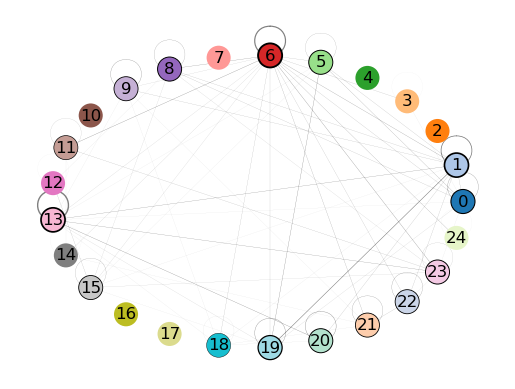

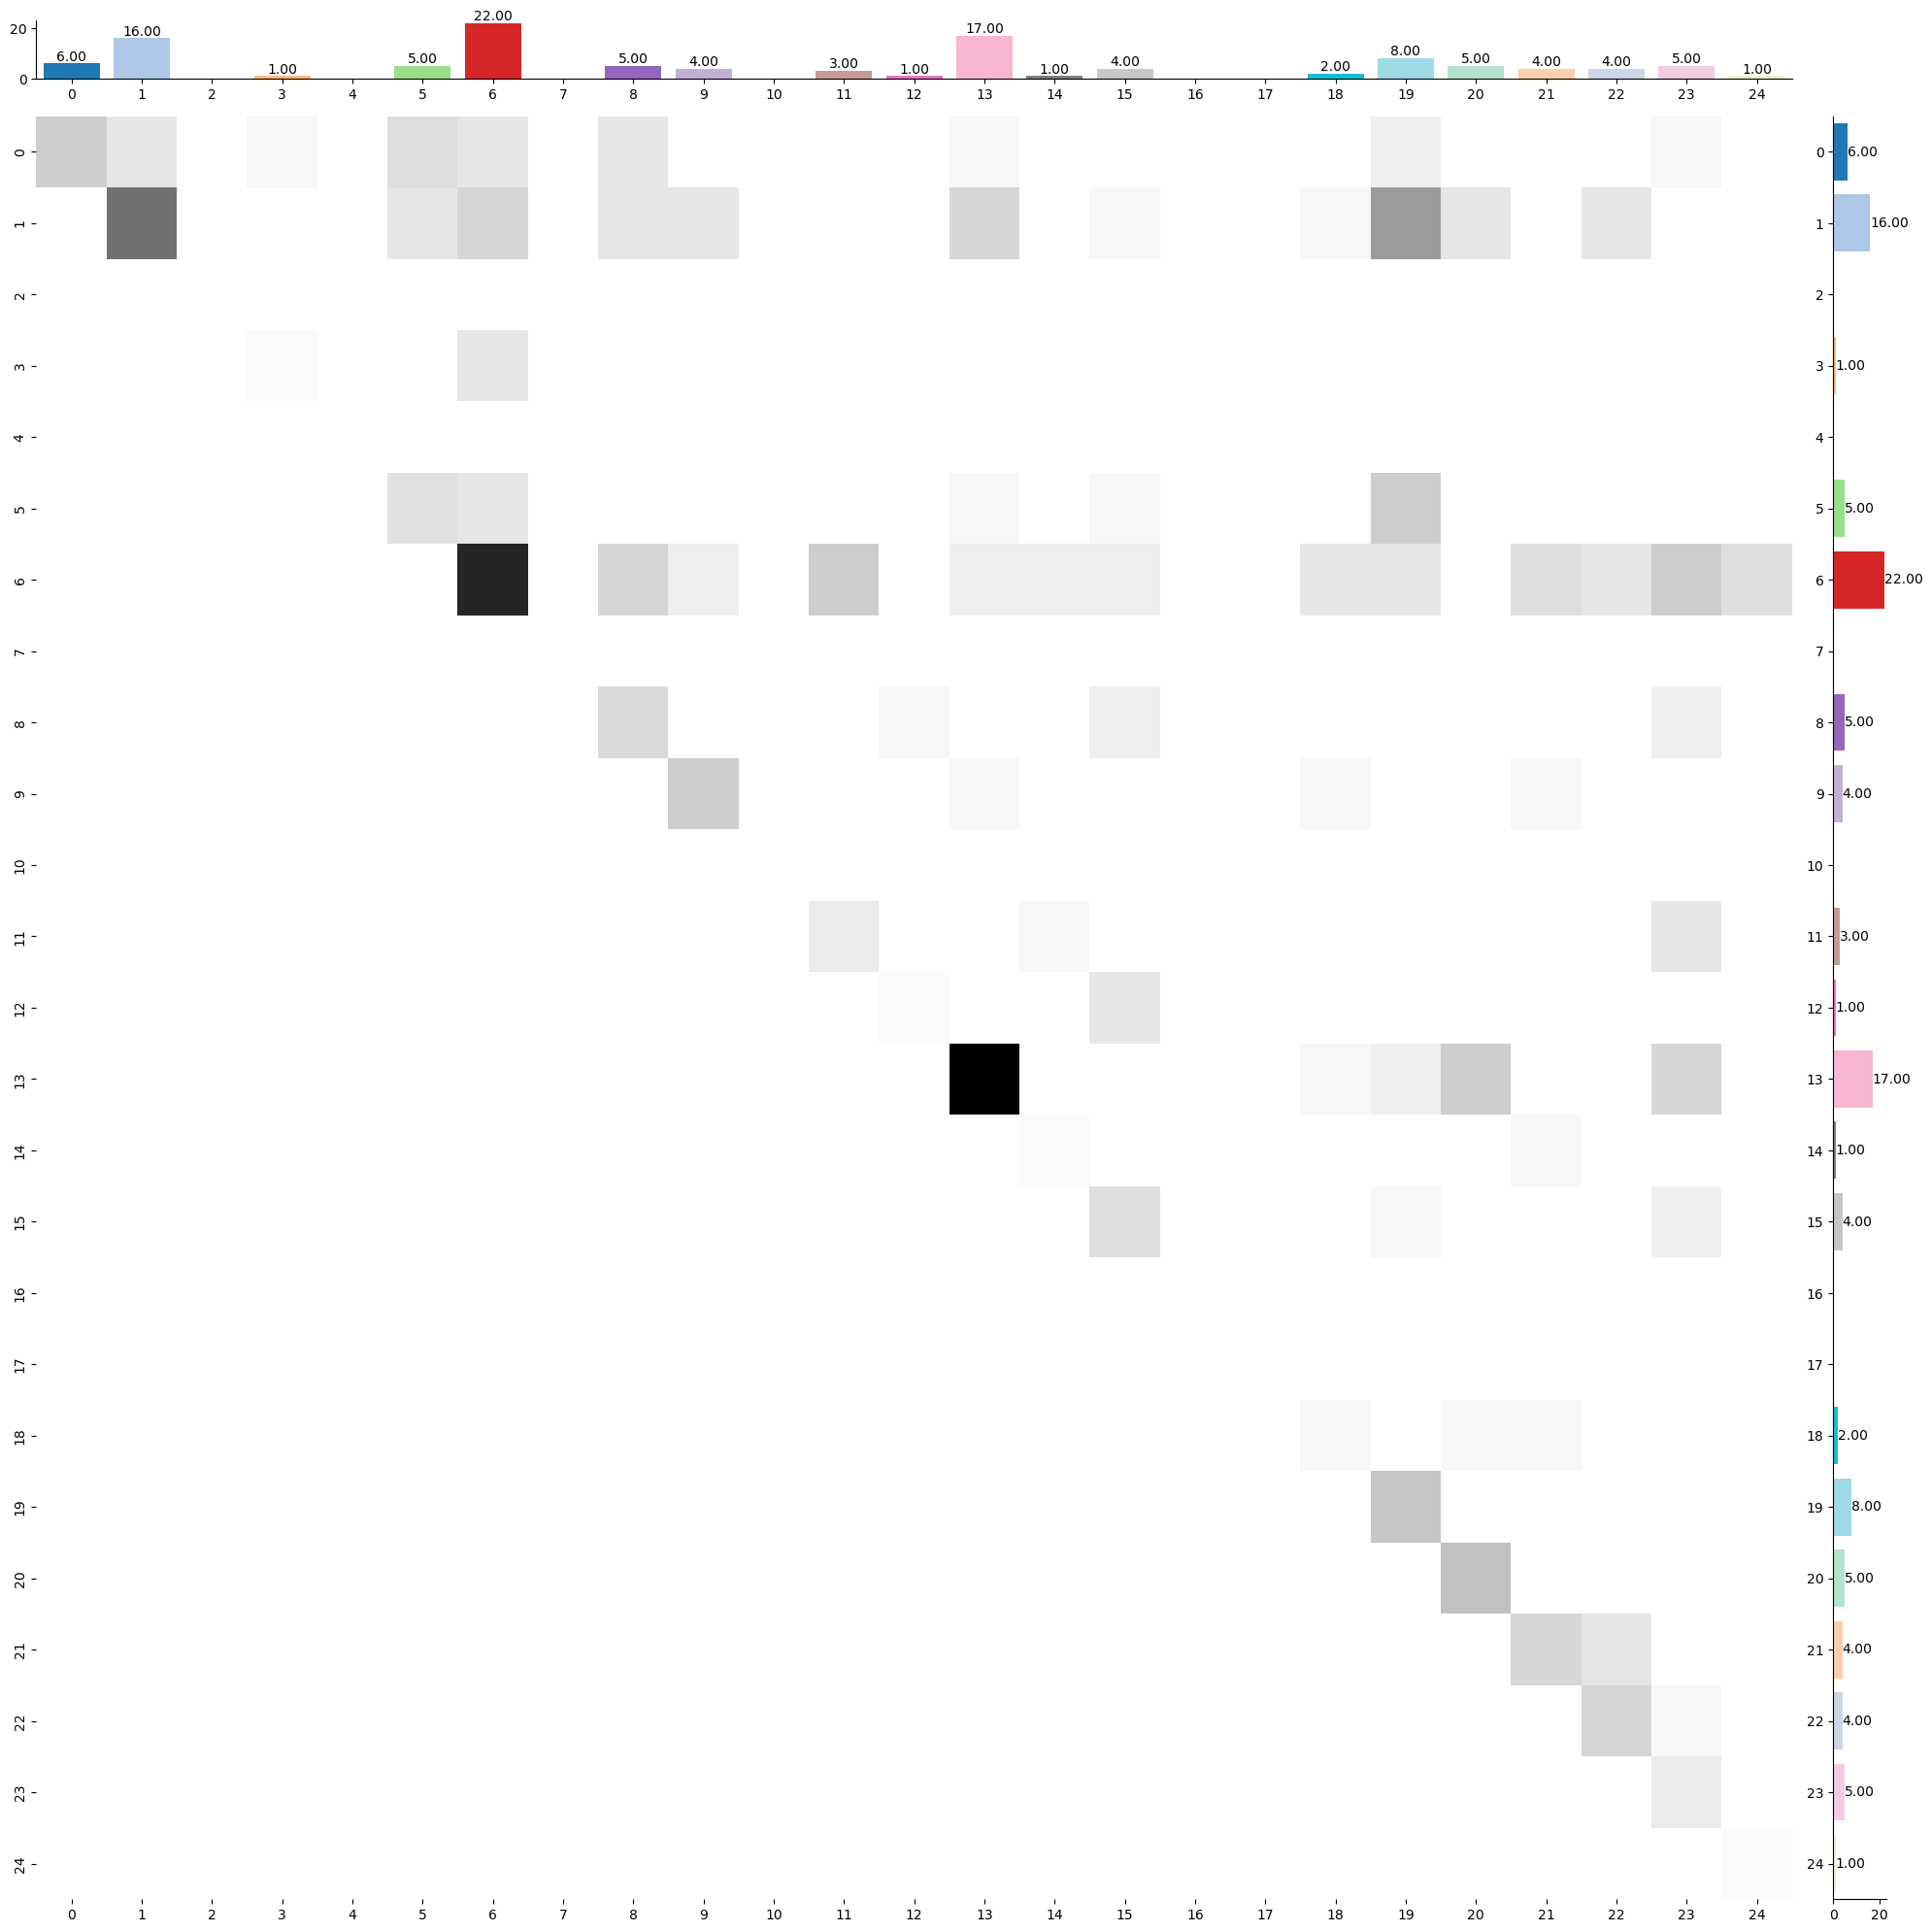

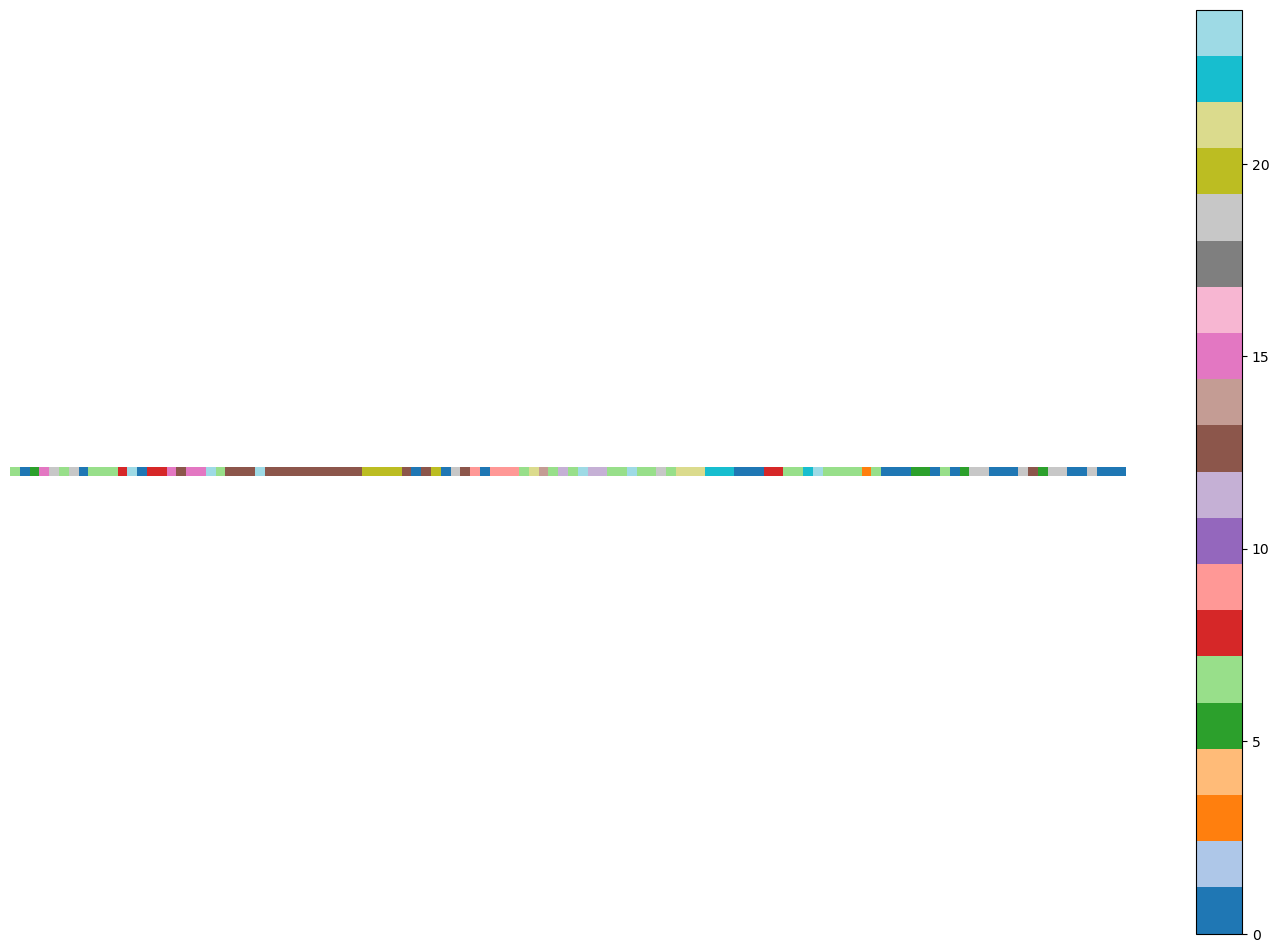

16.338648353091248


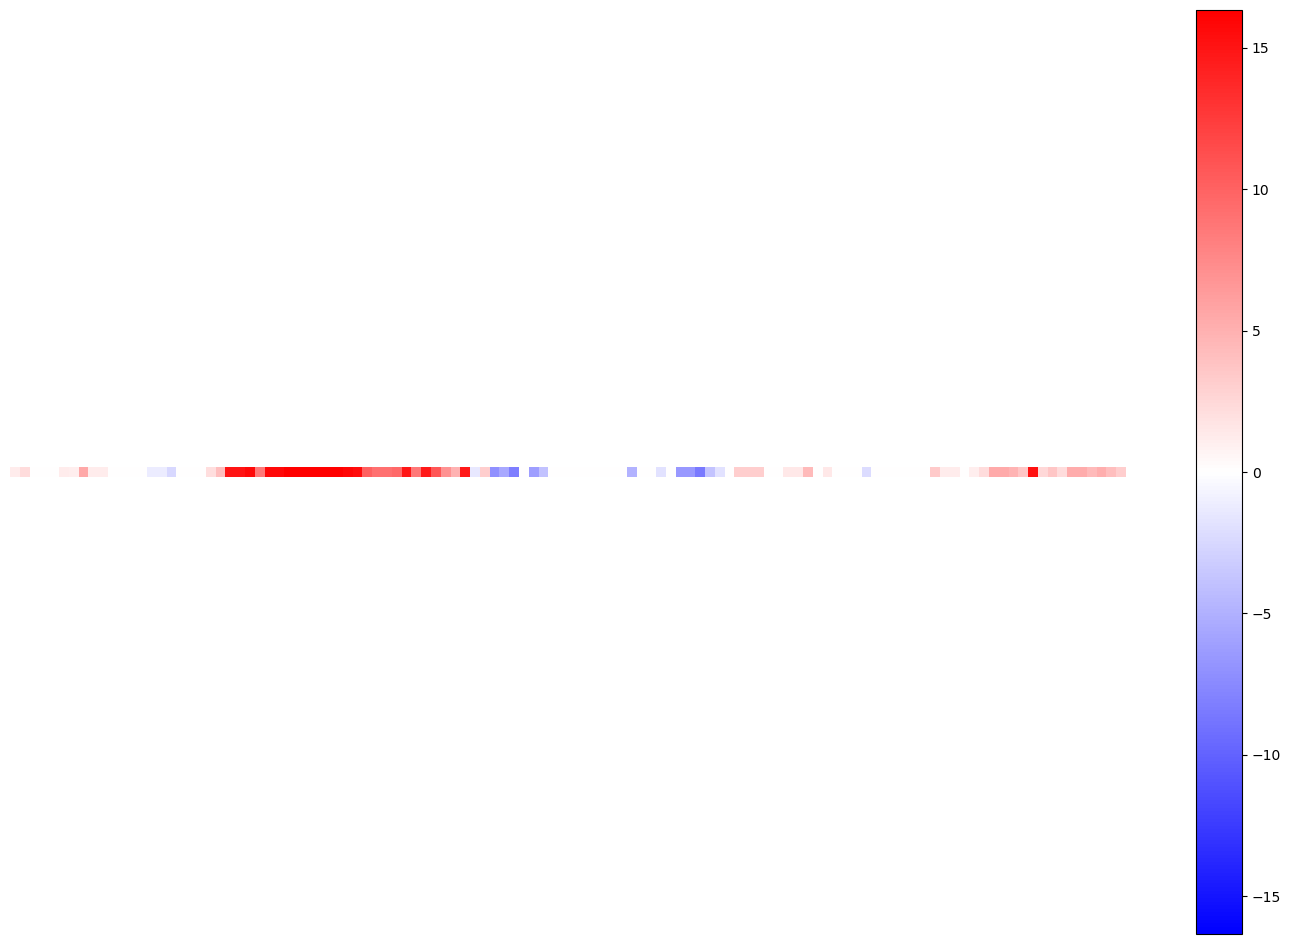

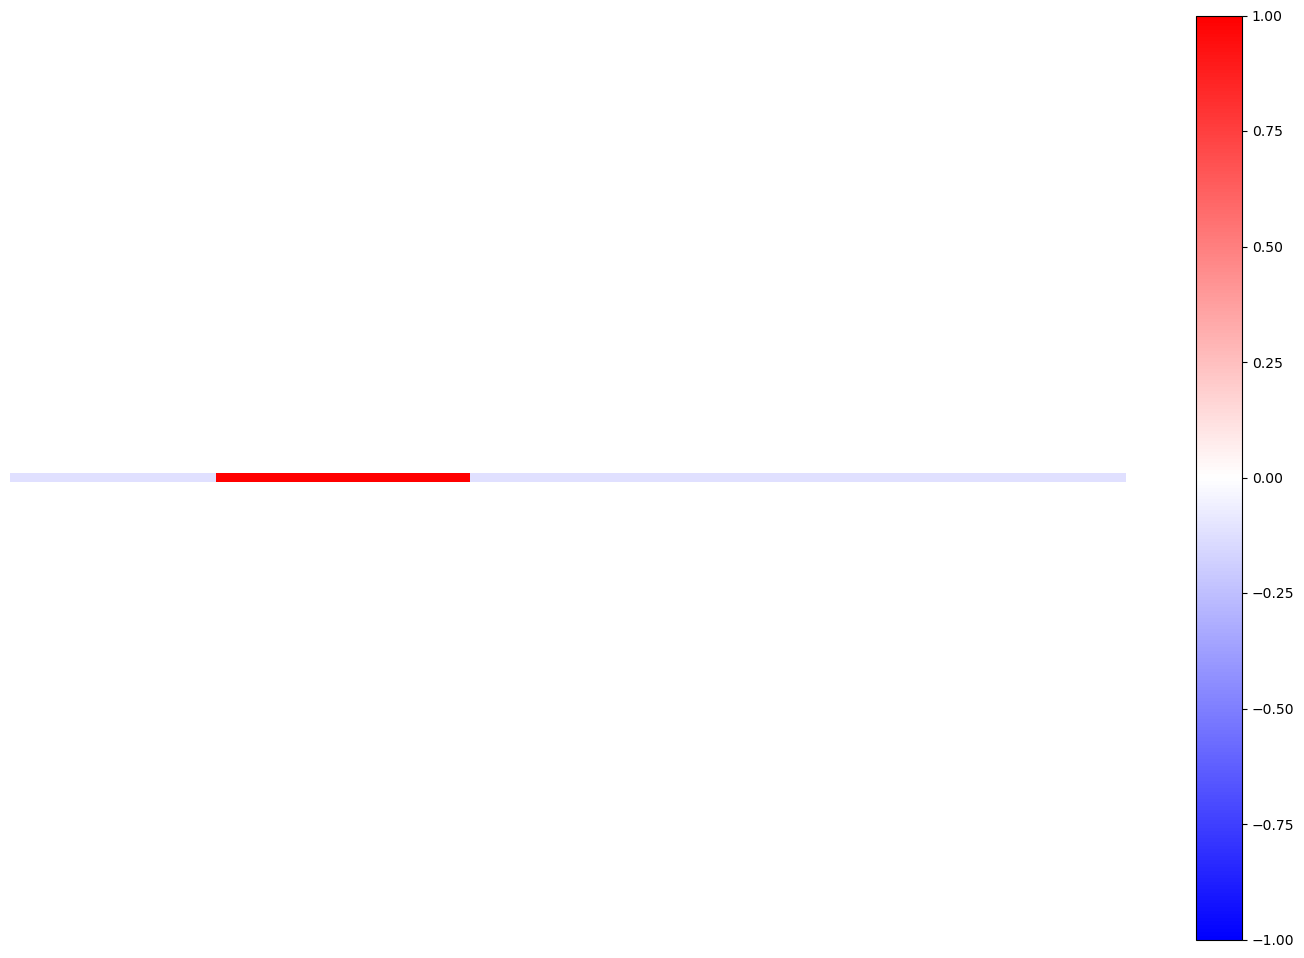

In [257]:
G_id = "doc_40_graph.obj" # 2, 40
gt_path = "/dfs/scratch1/gmachi/datasets/wikisection_processed/test_gts" #+ encoder_alias

kernel_map, sprite_viz, prospect_map, gt = create_visualizations(G_id, model_str, processor_cache_dir, model_cache_dir, G_test_dir, datatype="text", gt_path=gt_path)